# **Importing Needed Libraries**

In [169]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model
from keras.layers import Input, Dense
import missingno as msno

# **Loading the Data**

In [ ]:
patient_df = pd.read_csv ('patients_01.csv')

# **Exploring the data set**

In [ ]:
print(patient_df.describe())

               age          bmi  alcohol_misuse   health_gen  health_ment  \
count  5124.000000  5124.000000     4098.000000  5064.000000  5041.000000   
mean     55.038642    28.123341        2.394339     2.468009     3.399127   
std      16.497927     6.919013        2.908278     1.089227     7.732750   
min      16.000000     0.000000        0.000000     0.000000     0.000000   
25%      43.000000    24.000000        1.000000     2.000000     0.000000   
50%      56.000000    27.000000        2.000000     2.000000     0.000000   
75%      66.000000    31.000000        3.000000     3.000000     2.000000   
max     104.000000    87.000000       27.000000     5.000000    30.000000   

       health_phys  
count  4973.000000  
mean      4.007641  
std       9.619864  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       2.000000  
max      87.000000  


In [ ]:
print(patient_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    5124 non-null   int64  
 1   gender                 5124 non-null   object 
 2   bmi                    5124 non-null   int64  
 3   high_chol              4788 non-null   object 
 4   chol_check             4838 non-null   object 
 5   history_stroke         5124 non-null   bool   
 6   history_heart_disease  5072 non-null   object 
 7   history_smoking        3610 non-null   object 
 8   amount_activity        4191 non-null   object 
 9   alcohol_misuse         4098 non-null   float64
 10  fruits                 5019 non-null   object 
 11  vegetables             5012 non-null   object 
 12  health_gen             5064 non-null   float64
 13  health_ment            5041 non-null   float64
 14  health_phys            4973 non-null   float64
 15  walk

In [ ]:
# Number of samples
num_rows = len(patient_df)
print(num_rows)

5124


In [ ]:
# Identify the number of missing values in each feature
missing_values = patient_df.isnull().sum()
print(missing_values)

age                         0
gender                      0
bmi                         0
high_chol                 336
chol_check                286
history_stroke              0
history_heart_disease      52
history_smoking          1514
amount_activity           933
alcohol_misuse           1026
fruits                    105
vegetables                112
health_gen                 60
health_ment                83
health_phys               151
walking_diff                0
high_bp                     0
dissease                    0
dtype: int64


In [ ]:
# Calculating the percentage of missing values for each feature
round(100*(1-patient_df.count()/len(patient_df)),2)

age                       0.00
gender                    0.00
bmi                       0.00
high_chol                 6.56
chol_check                5.58
history_stroke            0.00
history_heart_disease     1.01
history_smoking          29.55
amount_activity          18.21
alcohol_misuse           20.02
fruits                    2.05
vegetables                2.19
health_gen                1.17
health_ment               1.62
health_phys               2.95
walking_diff              0.00
high_bp                   0.00
dissease                  0.00
dtype: float64

In [ ]:
# Extracting samples with 3 or more missing values
patient_df.loc[patient_df.isnull().sum(axis=1)>=3, :]

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,dissease
4,61,male,32,normal,checked,False,False,False,NaN,NaN,True,NaN,2.0,0.0,0.0,True,normal,False
6,55,male,37,high,notchecked,False,False,NaN,NaN,NaN,True,True,2.0,0.0,0.0,False,normal,False
33,34,female,29,normal,checked,False,False,NaN,NaN,NaN,True,True,3.0,15.0,3.0,False,normal,False
73,79,female,19,normal,checked,False,False,NaN,NaN,NaN,True,True,5.0,5.0,20.0,True,high,False
93,65,female,29,normal,checked,False,False,True,NaN,NaN,NaN,True,3.0,0.0,0.0,False,high,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,83,female,26,NaN,checked,False,False,False,NaN,NaN,False,True,2.0,20.0,6.0,True,normal,False
4990,69,female,35,normal,checked,False,False,False,NaN,NaN,False,False,3.0,0.0,NaN,False,high,True
4998,74,male,23,normal,NaN,False,False,NaN,NaN,1.0,True,True,1.0,0.0,0.0,False,high,False
5053,84,female,34,NaN,NaN,False,NaN,False,active,0.0,True,True,3.0,0.0,0.0,False,high,False


In [ ]:
# Extracting samples with 4 or more missing values
patient_df.loc[patient_df.isnull().sum(axis=1)>=4, :]

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,dissease
427,65,female,25,NaN,NaN,False,False,NaN,active,NaN,True,True,2.0,0.0,0.0,False,high,False
920,73,female,32,normal,notchecked,False,False,NaN,notactive,NaN,True,NaN,NaN,NaN,2.0,False,normal,False
1055,49,male,37,NaN,checked,False,False,False,NaN,NaN,False,True,5.0,0.0,NaN,True,high,True
1153,68,female,84,high,NaN,False,False,NaN,NaN,NaN,True,False,2.0,0.0,0.0,False,normal,False
1214,52,male,29,NaN,checked,False,NaN,True,NaN,NaN,False,False,2.0,10.0,0.0,False,high,False
1542,73,male,23,NaN,checked,False,True,NaN,NaN,NaN,True,True,3.0,0.0,0.0,False,normal,False
1560,37,female,25,normal,checked,False,False,True,NaN,2.0,True,NaN,3.0,NaN,NaN,False,normal,False
2144,68,female,21,normal,checked,False,False,NaN,NaN,NaN,True,NaN,2.0,0.0,0.0,False,normal,False
2243,19,female,39,NaN,checked,False,False,NaN,NaN,NaN,True,True,4.0,7.0,2.0,False,normal,False
2491,74,female,25,normal,checked,False,NaN,NaN,NaN,NaN,True,True,4.0,0.0,8.0,True,high,True


# **PLots**

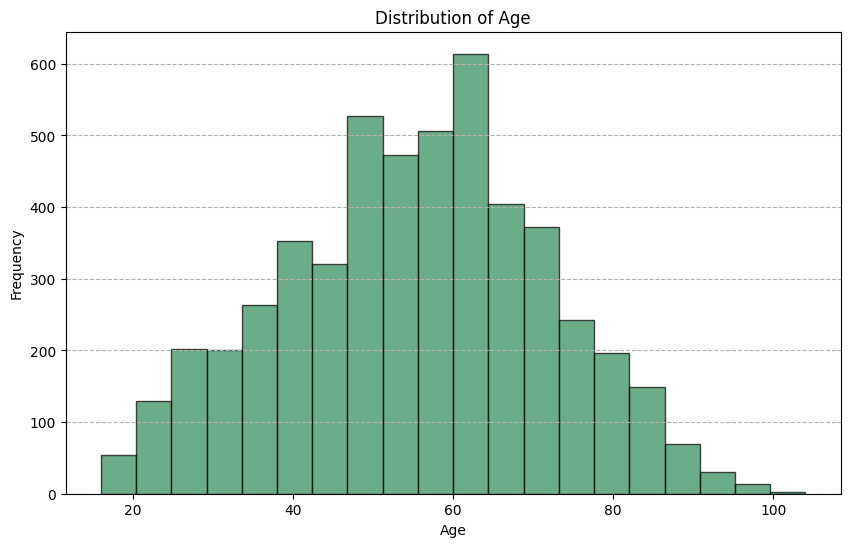

In [ ]:
# Plotting the distribution of age
plt.figure(figsize=(10, 6))

# Plotting the histogram with specified bins and color
plt.hist(patient_df['age'], bins=20, color="seagreen",alpha = 0.7, edgecolor="black")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(axis='y', linestyle='--')

plt.show()


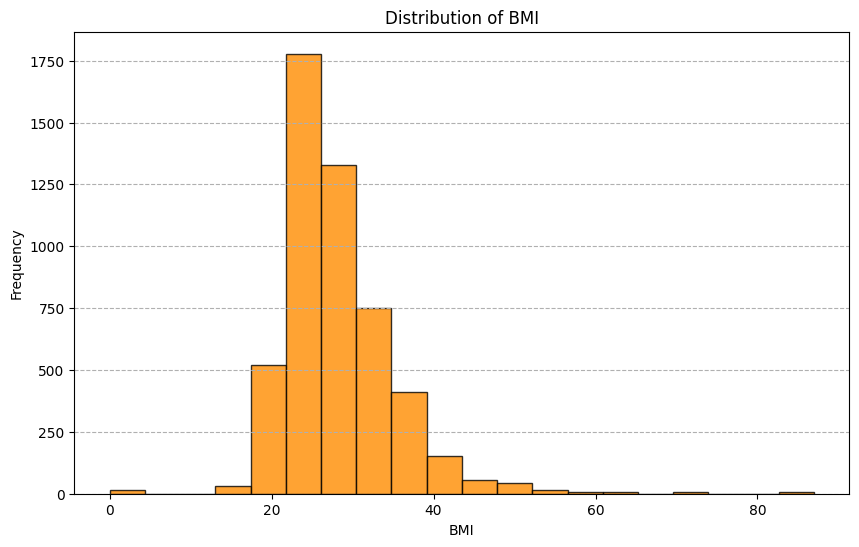

In [ ]:
# Plotting the distribution of BMI
plt.figure(figsize=(10, 6))

# Plotting the histogram with specified bins and color
plt.hist(patient_df['bmi'], bins=20, color="darkorange", alpha = 0.8,edgecolor="black")

plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.grid(axis='y', linestyle='--')

plt.show()

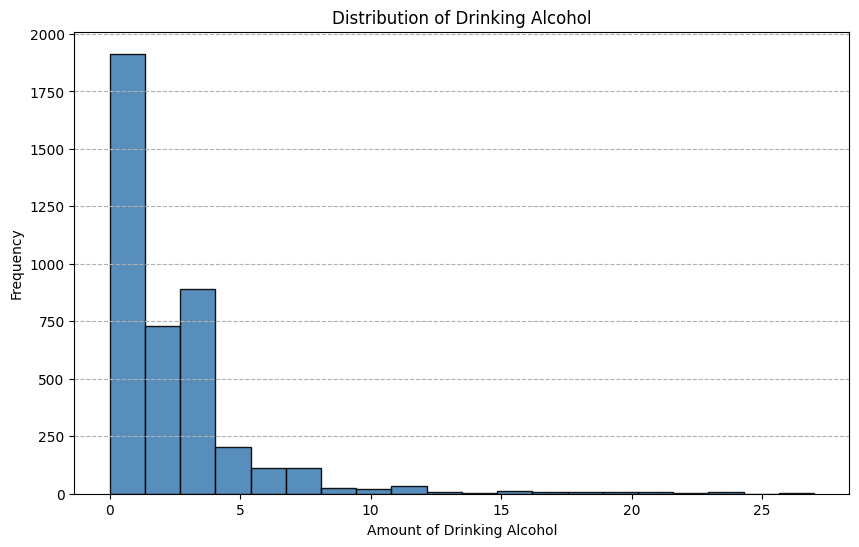

In [ ]:
# Plotting the distribution of drinking alcohol
plt.figure(figsize=(10, 6))

# Plotting the histogram with specified bins and color
plt.hist(patient_df['alcohol_misuse'], bins=20, color="steelblue",alpha = 0.9, edgecolor="black")

plt.xlabel('Amount of Drinking Alcohol')
plt.ylabel('Frequency')
plt.title('Distribution of Drinking Alcohol')
plt.grid(axis='y', linestyle='--')

plt.show()

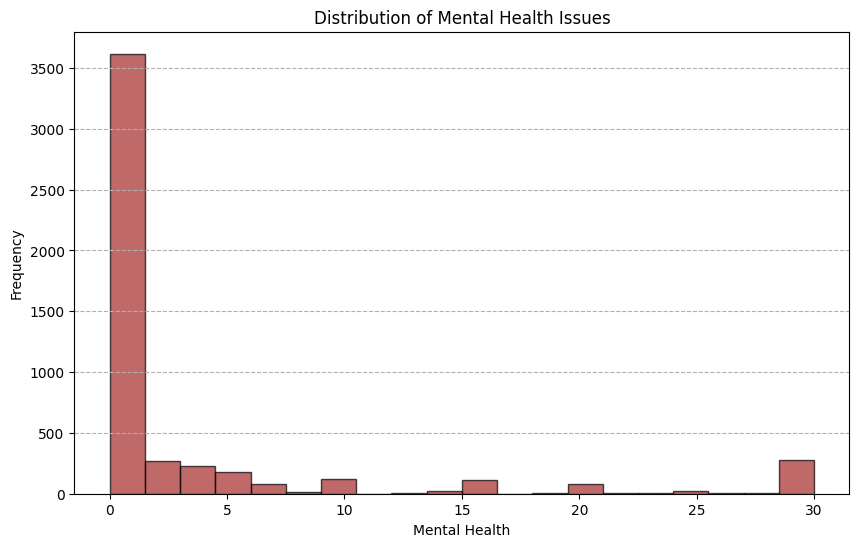

In [ ]:
# Plotting the distribution of having mental health issues
plt.figure(figsize=(10, 6))

# Plotting the histogram with specified bins and color
plt.hist(patient_df['health_ment'], bins=20, color="brown",alpha = 0.7, edgecolor="black")

plt.xlabel('Mental Health')
plt.ylabel('Frequency')
plt.title('Distribution of Mental Health Issues')
plt.grid(axis='y', linestyle='--')

plt.show()

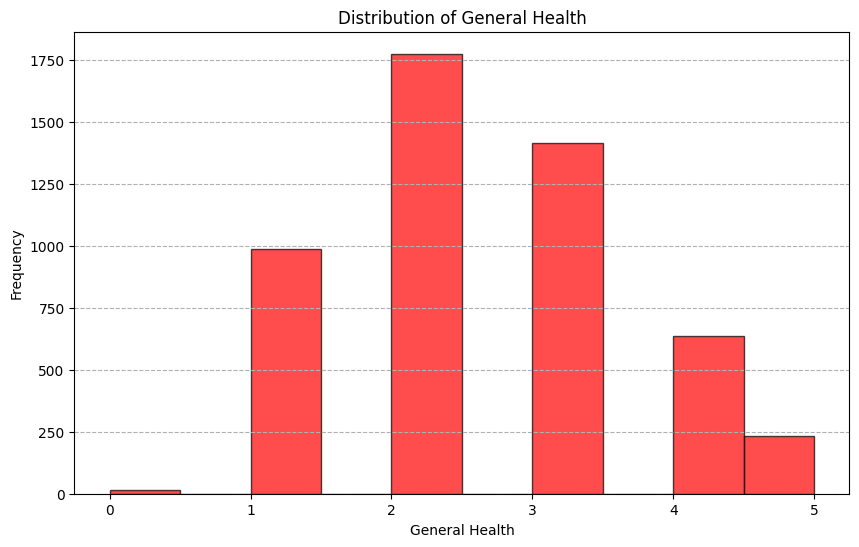

In [ ]:
# Plotting the distribution of having general health
plt.figure(figsize=(10, 6))

# Plotting the histogram with specified bins and color
plt.hist(patient_df['health_gen'], bins=10, color="red", alpha=0.7, edgecolor="black")

plt.xlabel('General Health')
plt.ylabel('Frequency')
plt.title('Distribution of General Health')
plt.grid(axis='y', linestyle='--')

plt.show()

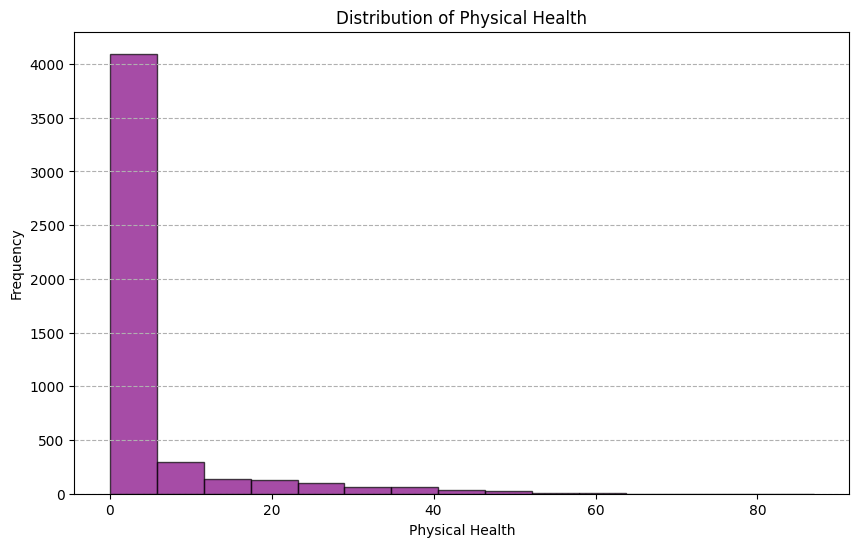

In [ ]:
# Plotting the distribution of having healthy body
plt.figure(figsize=(10, 6))

# Plotting the histogram with specified bins, color, transparency, and edgecolor
plt.hist(patient_df['health_phys'], bins=15, color="purple", alpha=0.7, edgecolor="black")

plt.xlabel('Physical Health')
plt.ylabel('Frequency')
plt.title('Distribution of Physical Health')
plt.grid(axis='y', linestyle='--')

plt.show()


# **Correlation**

*   We want to see if there is any correlation between the features
Not all the feature are numeric so we can only use the numeric ones
*   The code is generating a heatmap and the results will include numbers: these numbers shows the correlation coefficient between the corresponding pair of features

*  The colors are showing the the magnitude of the correlation coefficient. Darker colors represent stronger correlations, while lighter colors represent weaker correlations.




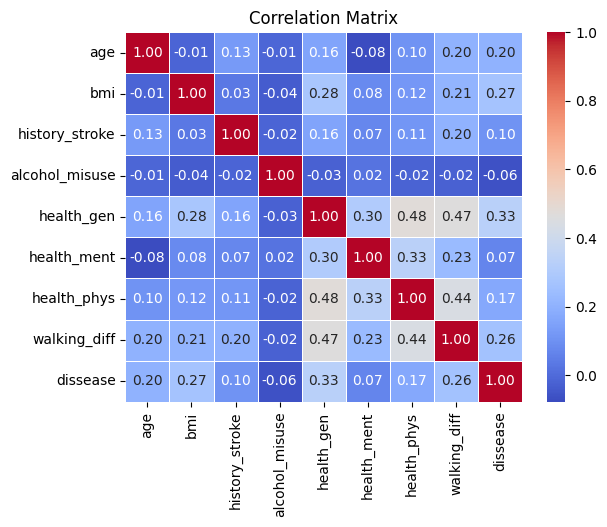

In [ ]:
correlation_matrix = patient_df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

# **Train & Test Split**

In [ ]:
X = patient_df.drop(['dissease'], axis=1)
y = patient_df['dissease']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=15)

In [ ]:
X_train

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp
1837,20,female,36,normal,checked,False,False,True,active,0.0,True,False,3.0,0.0,0.0,False,normal
3369,76,female,24,NaN,checked,False,False,True,notactive,2.0,False,False,4.0,3.0,0.0,False,high
3896,70,male,23,high,checked,False,False,False,active,4.0,False,False,5.0,22.0,23.0,True,high
3733,55,female,26,normal,checked,False,False,True,active,3.0,True,True,2.0,0.0,0.0,False,normal
4812,51,female,37,normal,checked,False,False,False,active,2.0,True,True,1.0,3.0,6.0,False,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,62,female,27,high,notchecked,False,False,False,active,2.0,True,NaN,2.0,0.0,0.0,False,normal
2715,26,female,22,normal,checked,False,False,False,active,NaN,False,True,2.0,2.0,0.0,False,normal
2204,72,female,30,normal,checked,False,False,NaN,active,4.0,True,True,4.0,5.0,7.0,True,normal
2693,59,female,24,NaN,checked,False,False,False,notactive,0.0,True,True,1.0,0.0,0.0,False,normal


### **Dealing with Missing Values**

In [ ]:
# Dealing with missing data in patient_df:

# Identify numeric and non-numeric columns
numeric_columns_df = patient_df.select_dtypes(include='number').columns
non_numeric_columns_df = patient_df.columns.difference(numeric_columns_df)

# Convert numeric columns to numeric type
patient_df[numeric_columns_df] = patient_df[numeric_columns_df].apply(pd.to_numeric, errors='coerce')

# Handle non-numeric columns (drop them for simplicity)
patient_df = patient_df.drop(columns=non_numeric_columns_df)

# Fill missing values for numeric columns
patient_df.loc[:, numeric_columns_df] = patient_df[numeric_columns_df].fillna(patient_df[numeric_columns_df].mean())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


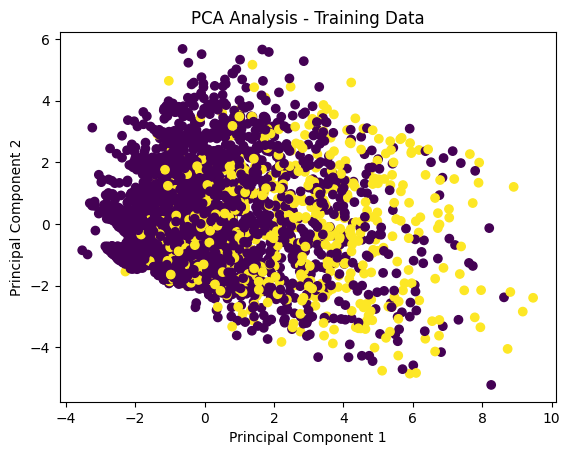

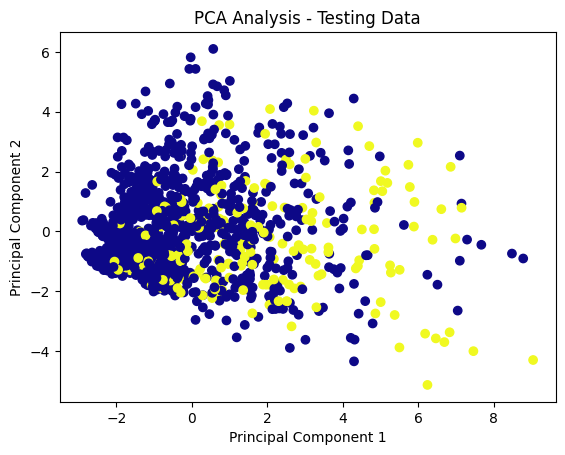

In [ ]:
# Dealing with missing data in the X_train and X_test:

# Imputation
numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.columns.difference(numeric_columns)

imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

X_train_numeric = pd.DataFrame(imputer_numeric.fit_transform(X_train[numeric_columns]), columns=numeric_columns)
X_train_categorical = pd.DataFrame(imputer_categorical.fit_transform(X_train[categorical_columns]), columns=categorical_columns)

X_test_numeric = pd.DataFrame(imputer_numeric.transform(X_test[numeric_columns]), columns=numeric_columns)
X_test_categorical = pd.DataFrame(imputer_categorical.transform(X_test[categorical_columns]), columns=categorical_columns)

# Concatenating imputed data
X_train_imputed = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_imputed = pd.concat([X_test_numeric, X_test_categorical], axis=1)

# One-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train_imputed[categorical_columns]), columns=encoder.get_feature_names_out())
X_test_encoded = pd.DataFrame(encoder.transform(X_test_imputed[categorical_columns]), columns=encoder.get_feature_names_out())

X_train_prepared = pd.concat([X_train_imputed.drop(categorical_columns, axis=1), X_train_encoded], axis=1)
X_test_prepared = pd.concat([X_test_imputed.drop(categorical_columns, axis=1), X_test_encoded], axis=1)

# Standardise data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_prepared)
X_test_scaled = scaler.transform(X_test_prepared)


# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualising PCA results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA Analysis - Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='plasma')
plt.title('PCA Analysis - Testing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
X_train_prepared

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys,amount_activity_active,amount_activity_notactive,chol_check_checked,chol_check_notchecked,...,history_heart_disease_False,history_heart_disease_True,history_smoking_False,history_smoking_True,history_stroke_False,history_stroke_True,vegetables_False,vegetables_True,walking_diff_False,walking_diff_True
0,20.0,36.0,0.000000,3.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,76.0,24.0,2.000000,4.0,3.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,70.0,23.0,4.000000,5.0,22.0,23.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,55.0,26.0,3.000000,2.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,51.0,37.0,2.000000,1.0,3.0,6.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,62.0,27.0,2.000000,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3839,26.0,22.0,2.391473,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3840,72.0,30.0,4.000000,4.0,5.0,7.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3841,59.0,24.0,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
X_train_encoded

,amount_activity_active,amount_activity_notactive,chol_check_checked,chol_check_notchecked,fruits_False,fruits_True,gender_female,gender_male,high_bp_high,high_bp_normal,...,history_heart_disease_False,history_heart_disease_True,history_smoking_False,history_smoking_True,history_stroke_False,history_stroke_True,vegetables_False,vegetables_True,walking_diff_False,walking_diff_True
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3839,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3840,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3841,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
categorical_columns

Index(['amount_activity', 'chol_check', 'fruits', 'gender', 'high_bp',
       'high_chol', 'history_heart_disease', 'history_smoking',
       'history_stroke', 'vegetables', 'walking_diff'],
      dtype='object')

# **Outliers Removal**

# Outlier Removal on patient_df

In [ ]:
# Performing outlier detection using Z-scores
p_num = patient_df[['age', 'bmi', 'alcohol_misuse', 'health_gen', 'health_ment', 'health_phys']]
z1 = np.abs(stats.zscore(p_num))
print('\nZ-Score Array:\n', z1)

print(p_num.shape)

threshold = 3
print('\nOutliers:\n', np.where(z1 > threshold))


Z-Score Array:
            age       bmi  alcohol_misuse  health_gen  health_ment  health_phys
0     0.785712  1.174175        0.151637    1.355849     0.443223     0.422921
1     0.062962  2.728496        0.536172    0.491345     0.443223     0.422921
2     0.002342  0.271259        0.920707    1.355849     0.443223     0.422921
3     0.669158  1.318719        1.386502    0.491345     2.164643     0.210251
4     0.361375  0.560345        0.000000    0.432252     0.443223     0.422921
...        ...       ...             ...         ...          ...          ...
5119  1.517832  1.572149        0.232898    0.432252     0.469530     0.422921
5120  0.669158  0.451458        0.151637    0.432252     0.443223     0.422921
5121  0.244821  0.560345        0.000000    0.432252     0.443223     0.422921
5122  1.760311  0.017828        0.000000    0.491345     0.443223     0.422921
5123  2.063409  1.029632        0.536172    0.432252     0.182437     0.422921

[5124 rows x 6 columns]
(5124, 6)


In [ ]:
p_num

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys
0,68,20,2.000000,1.0,0.0,0.0
1,54,47,1.000000,3.0,0.0,0.0
2,55,30,0.000000,1.0,0.0,0.0
3,44,19,6.000000,3.0,20.0,6.0
4,61,32,2.394339,2.0,0.0,0.0
...,...,...,...,...,...,...
5119,30,39,3.000000,2.0,7.0,0.0
5120,44,25,2.000000,2.0,0.0,0.0
5121,51,32,2.394339,2.0,0.0,0.0
5122,26,28,2.394339,3.0,0.0,0.0


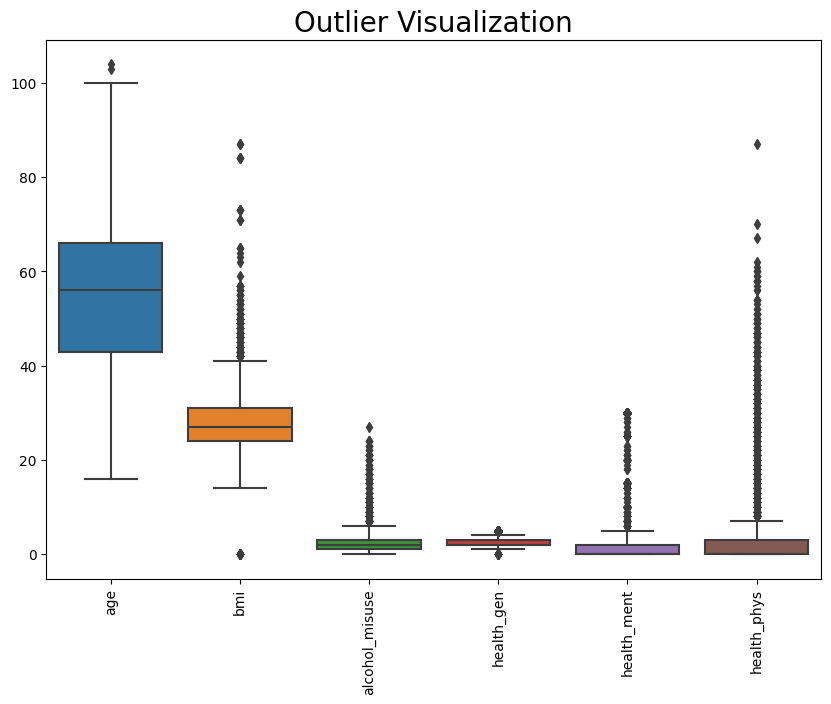

In [ ]:
# Ploting the all the  outliers
plt.figure(figsize=(10,7))
sns.boxplot(data=p_num)
plt.title('Outlier Visualization', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Removing outliers
p_outliers = (z1 < threshold).all(axis=1)
print(p_outliers.shape)
print('\nAfter Removing Outliers:\n', np.where(z1 < threshold))

p_outliers_removed = p_num[p_outliers]

(5124,)

After Removing Outliers:
 (array([   0,    0,    0, ..., 5123, 5123, 5123]), array([0, 1, 2, ..., 3, 4, 5]))


In [ ]:
p_outliers

0       True
1       True
2       True
3       True
4       True
        ... 
5119    True
5120    True
5121    True
5122    True
5123    True
Length: 5124, dtype: bool

In [ ]:
p_outliers_removed

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys
0,68,20,2.000000,1.0,0.0,0.0
1,54,47,1.000000,3.0,0.0,0.0
2,55,30,0.000000,1.0,0.0,0.0
3,44,19,6.000000,3.0,20.0,6.0
4,61,32,2.394339,2.0,0.0,0.0
...,...,...,...,...,...,...
5119,30,39,3.000000,2.0,7.0,0.0
5120,44,25,2.000000,2.0,0.0,0.0
5121,51,32,2.394339,2.0,0.0,0.0
5122,26,28,2.394339,3.0,0.0,0.0


# Outlier Removal on X_train

In [ ]:
# Splitting a training dataset
X_train_num = X_train_imputed[['age', 'bmi', 'alcohol_misuse', 'health_gen', 'health_ment', 'health_phys']]
X_train_cat = X_train_imputed[['gender', 'high_bp', 'high_chol', 'chol_check', 'history_smoking', 'history_stroke', 'history_heart_disease', 'amount_activity', 'fruits', 'vegetables', 'walking_diff']]

X_train_num

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys
0,20.0,36.0,0.000000,3.0,0.0,0.0
1,76.0,24.0,2.000000,4.0,3.0,0.0
2,70.0,23.0,4.000000,5.0,22.0,23.0
3,55.0,26.0,3.000000,2.0,0.0,0.0
4,51.0,37.0,2.000000,1.0,3.0,6.0
...,...,...,...,...,...,...
3838,62.0,27.0,2.000000,2.0,0.0,0.0
3839,26.0,22.0,2.391473,2.0,2.0,0.0
3840,72.0,30.0,4.000000,4.0,5.0,7.0
3841,59.0,24.0,0.000000,1.0,0.0,0.0


In [ ]:
# Calculating the Z-scores for each element in the X_train_num
z1 = np.abs(stats.zscore(X_train_num))
print('\nZ-Score Array:\n', z1)
print(X_train_num.shape)

threshold = 3
print('\nOutliers:\n', np.where(z1 < threshold))


Z-Score Array:
            age       bmi  alcohol_misuse  health_gen  health_ment  health_phys
0     2.126519  1.124585        0.913683    0.470527     0.443662     0.429262
1     1.259147  0.590123        0.149566    1.387135     0.049203     0.429262
2     0.896397  0.733016        0.614552    2.303742     2.449039     1.972270
3     0.010478  0.304339        0.232493    0.446081     0.443662     0.429262
4     0.252311  1.267477        0.149566    1.362688     0.049203     0.197224
...        ...       ...             ...         ...          ...          ...
3838  0.412731  0.161446        0.149566    0.446081     0.443662     0.429262
3839  1.763769  0.875908        0.000000    0.446081     0.180689     0.429262
3840  1.017314  0.267231        0.614552    1.387135     0.213770     0.301639
3841  0.231356  0.590123        0.913683    1.362688     0.443662     0.429262
3842  0.131394  0.410123        0.531624    1.362688     0.180689     0.220434

[3843 rows x 6 columns]
(3843, 6)


In [ ]:
# Identifying outliers in X_train
X_train_outliers = (z1 < threshold).all(axis=1)
print(X_train_outliers.shape)
X_train_outliers

(3843,)


0       True
1       True
2       True
3       True
4       True
        ... 
3838    True
3839    True
3840    True
3841    True
3842    True
Length: 3843, dtype: bool

In [ ]:
# Remove the outliers in X_train
X_train_outliers_removed = X_train_num[X_train_outliers]
print('\nAfter Removing Outliers:\n', np.where(z1 < threshold))


After Removing Outliers:
 (array([   0,    0,    0, ..., 3842, 3842, 3842]), array([0, 1, 2, ..., 3, 4, 5]))


In [ ]:
X_train_outliers_removed

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys
0,20.0,36.0,0.000000,3.0,0.0,0.0
1,76.0,24.0,2.000000,4.0,3.0,0.0
2,70.0,23.0,4.000000,5.0,22.0,23.0
3,55.0,26.0,3.000000,2.0,0.0,0.0
4,51.0,37.0,2.000000,1.0,3.0,6.0
...,...,...,...,...,...,...
3838,62.0,27.0,2.000000,2.0,0.0,0.0
3839,26.0,22.0,2.391473,2.0,2.0,0.0
3840,72.0,30.0,4.000000,4.0,5.0,7.0
3841,59.0,24.0,0.000000,1.0,0.0,0.0


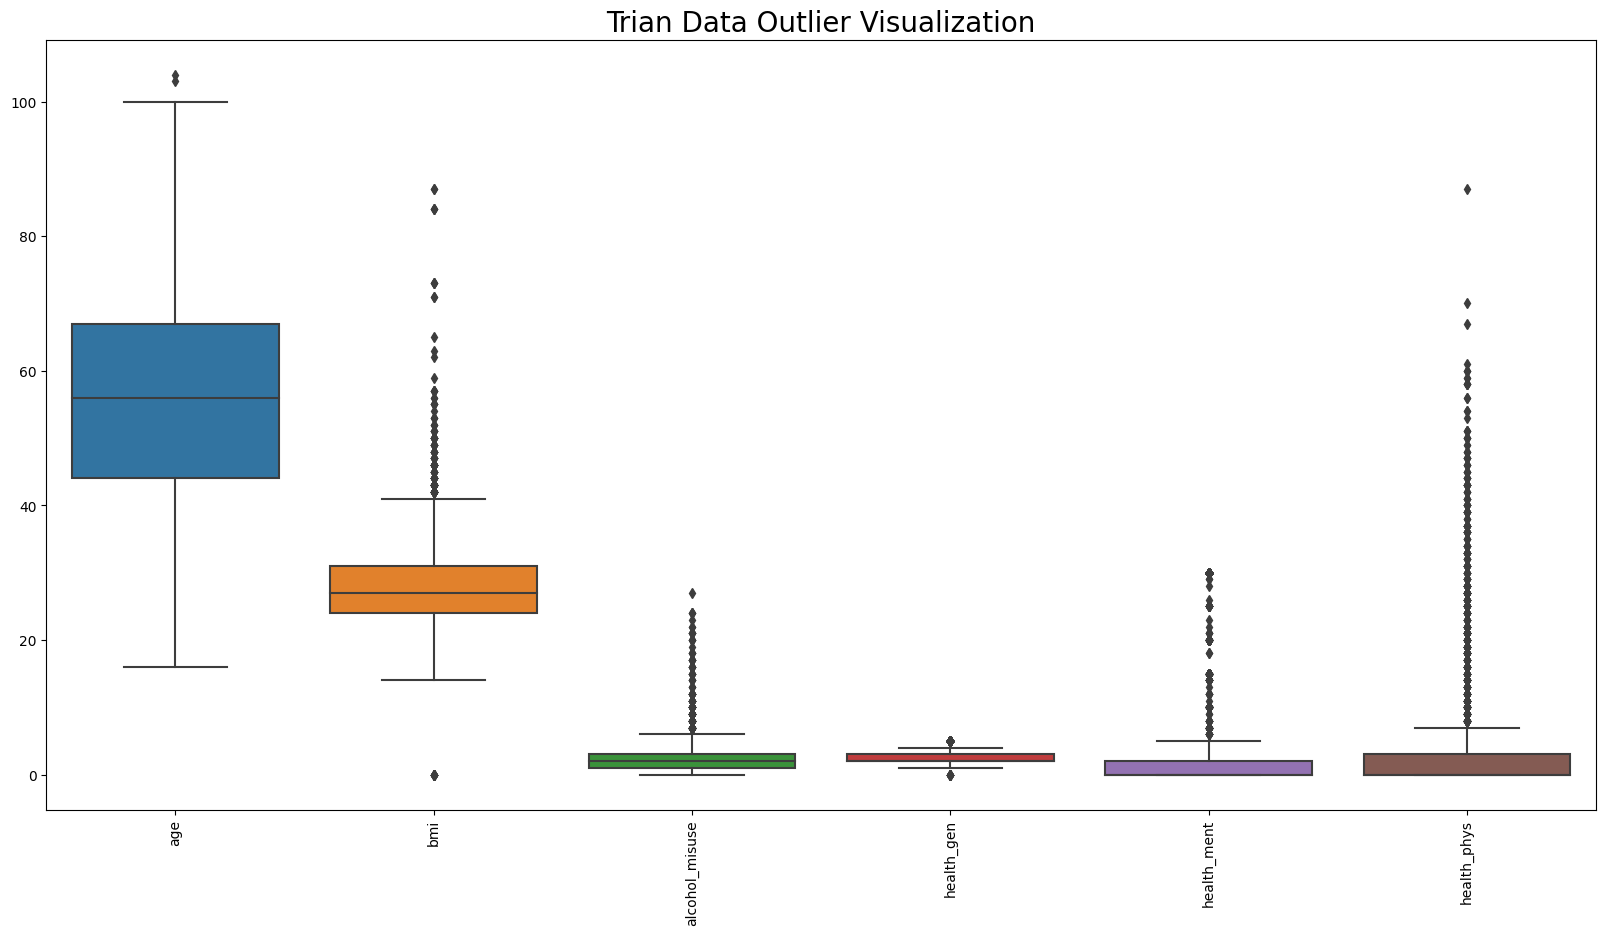

In [ ]:
# Ploting the train data outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=X_train_num)
plt.title('Trian Data Outlier Visualization', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print('\nAfter Removing Outliers:\n', np.where(z1 < threshold))


After Removing Outliers:
 (array([   0,    0,    0, ..., 3842, 3842, 3842]), array([0, 1, 2, ..., 3, 4, 5]))


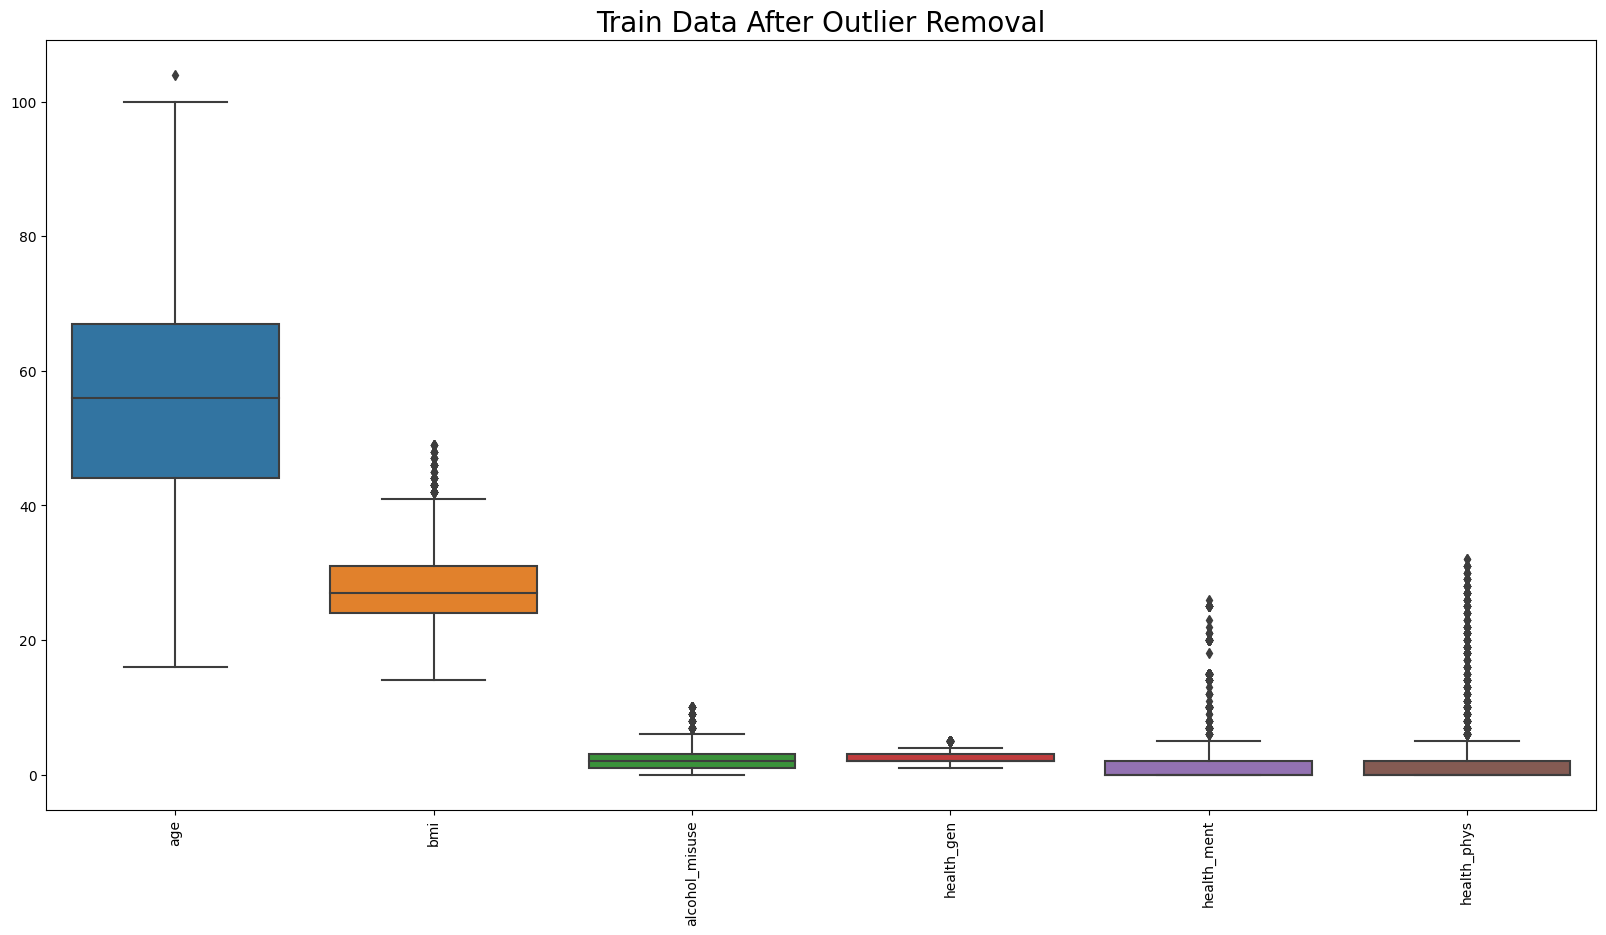

In [ ]:
# Ploting the train data after removing the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=X_train_outliers_removed)
plt.title('Train Data After Outlier Removal', fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Outlier Removal on X_test

In [ ]:
# Calculating the Z-scores for each element in the X_test_num
X_test_num = X_test_imputed[['age', 'bmi', 'alcohol_misuse', 'health_gen', 'health_ment', 'health_phys']]
X_test_cat = X_test_imputed[['gender', 'high_bp', 'high_chol', 'chol_check', 'history_smoking', 'history_stroke', 'history_heart_disease', 'amount_activity', 'fruits', 'vegetables', 'walking_diff']]

z2 = np.abs(stats.zscore(X_test_prepared))
print('\nZ-Score Array:\n', z2)

print(X_test_num.shape)
threshold = 3
print('\nOutliers:\n', np.where(z2 < threshold))


Z-Score Array:
            age       bmi  alcohol_misuse  health_gen  health_ment  \
0     0.038801  0.315286        0.941686    1.338436     0.187389   
1     0.283345  0.914740        0.549421    1.338436     0.449002   
2     1.550738  0.615013        0.549421    2.450707     0.441945   
3     0.144608  0.914740        1.411900    1.338436     0.441945   
4     1.122786  1.214467        0.157157    0.069860     0.441945   
...        ...       ...             ...         ...          ...   
1276  0.144608  0.883621        0.157157    1.503421     0.830836   
1277  0.344481  1.333211        0.627372    2.450707     0.441945   
1278  0.511424  0.315286        2.588693    0.556135     0.830836   
1279  1.444931  1.064603        0.627372    1.338436     0.194446   
1280  0.755969  0.015560        2.588693    1.503421     0.441945   

      health_phys  amount_activity_active  amount_activity_notactive  \
0        0.404971                0.493649                   0.493649   
1        0

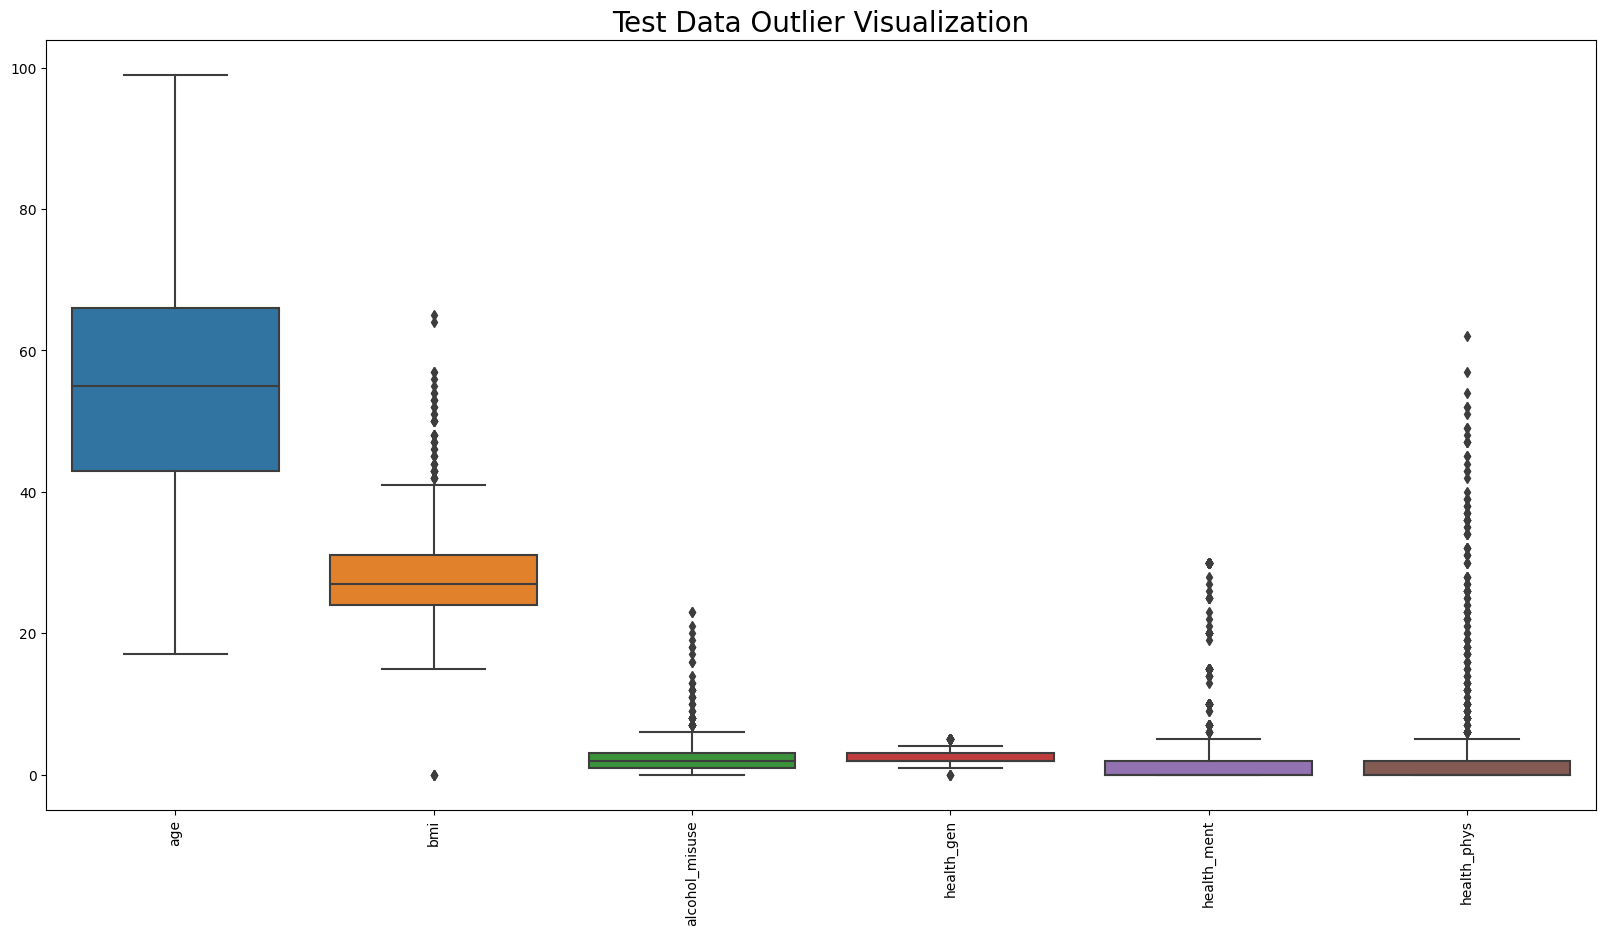

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=X_test_num)
plt.title('Test Data Outlier Visualization', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Identifying outliers in X_test
X_test_outliers = (z2 < threshold).all(axis=1)
print(X_test_outliers.shape)
z2 = np.abs(stats.zscore(X_test_outliers))
print('\nAfter Removing Outliers:\n', np.where(z2 < threshold))

(1281,)

After Removing Outliers:
 (array([   0,    1,    2, ..., 1278, 1279, 1280]),)


In [ ]:
#
X_test_outliers_removed = X_test_prepared[X_test_outliers]
print('\nAfter Removing Outliers:\n', np.where(z1 < threshold))


After Removing Outliers:
 (array([   0,    0,    0, ..., 3842, 3842, 3842]), array([0, 1, 2, ..., 3, 4, 5]))


In [ ]:
X_test_outliers_removed

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys,amount_activity_active,amount_activity_notactive,chol_check_checked,chol_check_notchecked,...,history_heart_disease_False,history_heart_disease_True,history_smoking_False,history_smoking_True,history_stroke_False,history_stroke_True,vegetables_False,vegetables_True,walking_diff_False,walking_diff_True
0,54.0,26.0,0.000000,1.000000,2.0,0.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,50.0,22.0,1.000000,1.000000,7.0,1.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,57.0,22.0,6.000000,1.000000,0.0,0.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,73.0,20.0,2.000000,2.486665,0.0,0.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,72.0,29.0,0.000000,3.000000,0.0,0.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,27.0,23.0,2.391473,1.000000,3.0,0.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1276,57.0,34.0,2.000000,4.000000,10.0,0.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1278,63.0,26.0,9.000000,3.000000,10.0,3.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1279,31.0,21.0,4.000000,1.000000,5.0,0.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


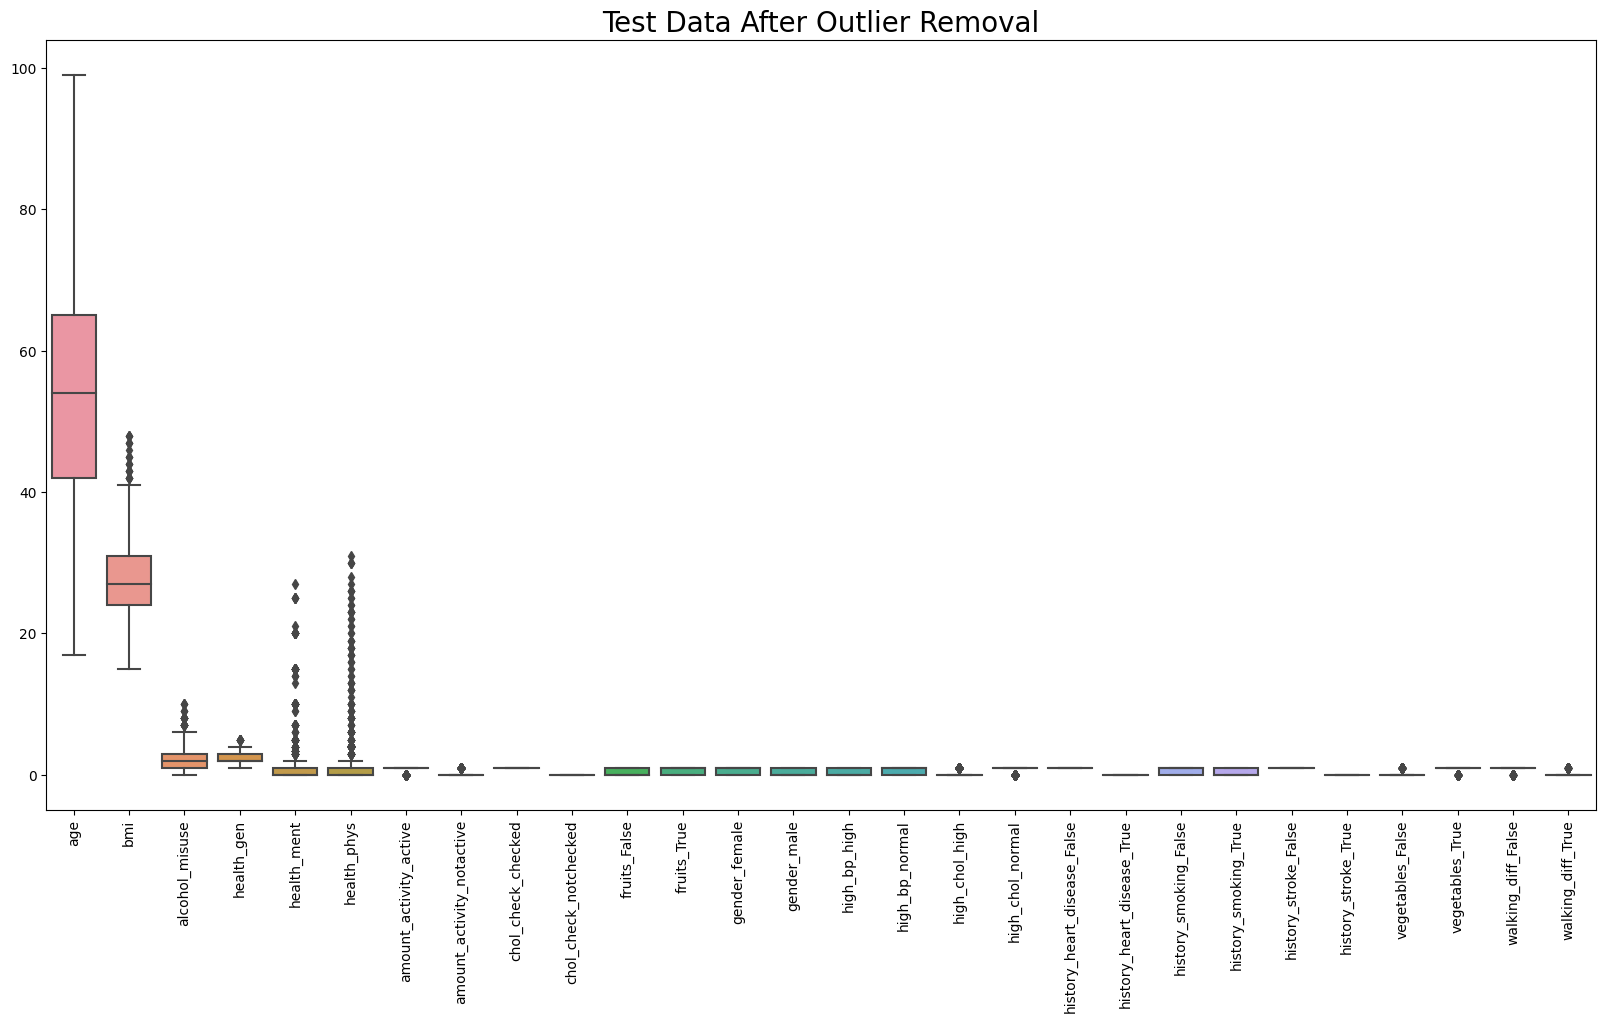

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=X_test_outliers_removed)
plt.title('Test Data After Outlier Removal', fontsize=20)
plt.xticks(rotation=90)
plt.show()

# **Clustering**

# Hierarchical Clustering

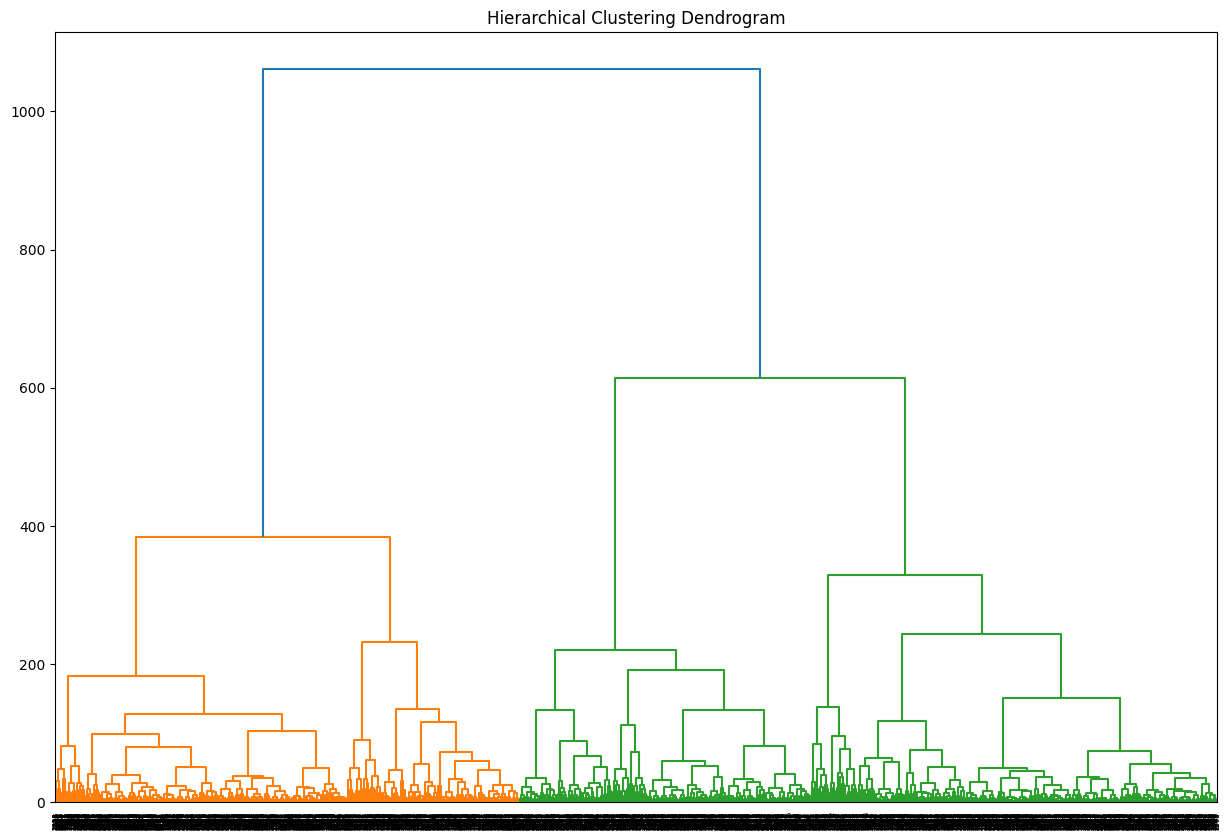

In [ ]:
plt.figure(figsize=(15, 10))
linkage_matrix = linkage(X_train_outliers_removed, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
k = 2
clusters = fcluster(linkage_matrix, k, criterion='maxclust')

In [ ]:
X_train_scaled

array([[-2.1265186 ,  1.12458477, -0.91368302, ..., -2.14523677,
         0.46242242, -0.46242242],
       [ 1.25914707, -0.59012349, -0.14956562, ..., -2.14523677,
         0.46242242, -0.46242242],
       [ 0.89639718, -0.73301584,  0.61455179, ..., -2.14523677,
        -2.16252492,  2.16252492],
       ...,
       [ 1.01731381,  0.26723064,  0.61455179, ...,  0.46614901,
        -2.16252492,  2.16252492],
       [ 0.23135571, -0.59012349, -0.91368302, ...,  0.46614901,
         0.46242242, -0.46242242],
       [-0.13139418,  0.41012299, -0.53162432, ..., -2.14523677,
         0.46242242, -0.46242242]])

# KMeans clustering

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_prepared)

# Assign cluster labels to the original data
X_train['cluster'] = kmeans.labels_

# Combine the cluster labels with the original training set
patient_df_with_clusters = patient_df.loc[X_train.index].copy()
patient_df_with_clusters['cluster'] = X_train['cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Explore characteristics of each cluster
for cluster_label in range(num_clusters):
    cluster_data = patient_df_with_clusters[patient_df_with_clusters['cluster'] == cluster_label]
    print(f'\nCluster {cluster_label} Characteristics:')
    print(cluster_data.describe())


Cluster 0 Characteristics:
               age          bmi  alcohol_misuse   health_gen  health_ment  \
count  1672.000000  1672.000000     1672.000000  1672.000000  1672.000000   
mean     39.925239    28.043062        2.427071     2.276658     3.896035   
std       9.586597     7.570016        2.630642     1.011418     7.892525   
min      16.000000     0.000000        0.000000     0.000000     0.000000   
25%      33.000000    23.000000        1.000000     2.000000     0.000000   
50%      41.000000    27.000000        2.000000     2.000000     0.000000   
75%      48.000000    31.000000        3.000000     3.000000     3.099782   
max      54.000000    87.000000       24.000000     5.000000    30.000000   

       health_phys  cluster  
count  1672.000000   1672.0  
mean      2.666501      0.0  
std       6.924956      0.0  
min       0.000000      0.0  
25%       0.000000      0.0  
50%       0.000000      0.0  
75%       2.000000      0.0  
max      60.000000      0.0  

Cluster

In [ ]:
# Calculate the mean of each feature for each cluster
# Exclude non-numeric columns from the calculation
cluster_means = patient_df_with_clusters.select_dtypes(include=['number']).groupby('cluster').mean()
print("\nMean Value of Features for Each Cluster:")
print(cluster_means)



Mean Value of Features for Each Cluster:
               age        bmi  alcohol_misuse  health_gen  health_ment  \
cluster                                                                  
0        39.925239  28.043062        2.427071    2.276658     3.896035   
1        66.916628  28.196684        2.365043    2.647921     2.973086   

         health_phys  
cluster               
0           2.666501  
1           5.218108  


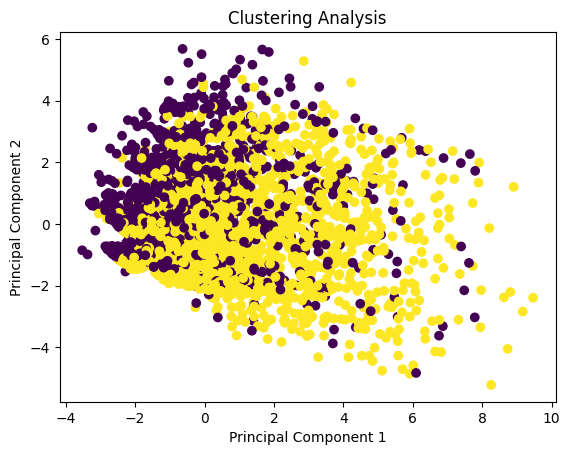

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# **Classifier: The Model**

In [ ]:
# Prepare the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Train and evaluate the classifiers
results = {}
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)[:, 1]

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC Score": roc_auc,
        "Cross-validation scores": cv_scores.tolist(),  # Convert to list for printing

    }

    # Print the performance
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}\n")
    print(f"Cross-validation scores: {cv_scores}\n")

# Compare results
results_df = pd.DataFrame(results).transpose()
print("Comparison of Classifiers:")
print(results_df)


# **What is the most important feature?**

In [ ]:
# Feature importance
# Train the classifier
clf =GradientBoostingClassifier(random_state=42)
clf.fit(X_train_prepared, y_train)

feature_importance = clf.feature_importances_
important_features = X_train_prepared.columns[np.argsort(feature_importance)[::-1]]

print("Most Important Feature:", important_features[0])

# 6.2 Exclude the best feature and retrain the classifier
X_train_subset = X_train_prepared.drop(important_features[0], axis=1)
X_test_subset = X_test_prepared.drop(important_features[0], axis=1)

clf_subset = RandomForestClassifier(random_state=42)
clf_subset.fit(X_train_subset, y_train)

y_pred_test_subset = clf_subset.predict(X_test_subset)
print("Test Accuracy (Excluding Best Feature):", accuracy_score(y_test, y_pred_test_subset))


Most Important Feature: health_gen
Test Accuracy (Excluding Best Feature): 0.8329430132708822


In [ ]:
# Train the classifier
clf =RandomForestClassifier(random_state=42)
clf.fit(X_train_prepared, y_train)

feature_importance = clf.feature_importances_
important_features = X_train_prepared.columns[np.argsort(feature_importance)[::-1]]

print("Most Important Feature:", important_features[0])

# 6.2 Exclude the best feature and retrain the classifier
X_train_subset = X_train_prepared.drop(important_features[0], axis=1)
X_test_subset = X_test_prepared.drop(important_features[0], axis=1)

clf_subset = RandomForestClassifier(random_state=42)
clf_subset.fit(X_train_subset, y_train)

y_pred_test_subset = clf_subset.predict(X_test_subset)
print("Test Accuracy (Excluding Best Feature):", accuracy_score(y_test, y_pred_test_subset))

Most Important Feature: bmi
Test Accuracy (Excluding Best Feature): 0.8290398126463701
